In [ ]:
%matplotlib inline


import sys
import os.path
sys.path.append(os.path.join('..', 'util'))

import set_compiler
set_compiler.install()

import pyximport
pyximport.install()

import numpy as np
import pylab

import filtering
from timer import Timer
import threading

In [14]:
def wait_for_event(e):
    """Wait for the event to be set before doing anything"""
    logging.debug('wait_for_event starting')
    event_is_set = e.wait()
    logging.debug('event set: %s', event_is_set)


In [2]:
def py_median_3x3(image, iterations=10, num_threads=1):
    ''' repeatedly filter with a 3x3 median '''
    tmpA = image.copy()
    tmpB = np.empty_like(tmpA)
    
    for i in range(iterations):
        filtering.median_3x3(tmpA, tmpB, 0, 1)
        # swap direction of filtering
        tmpA, tmpB = tmpB, tmpA

    return tmpA


In [6]:
def parallel_function(tmpA, tmpB, t, num_threads, events_list, iterations):
    for i in range(iterations):
        events_list[t].clear()
        filtering.median_3x3(tmpA, tmpB, t, num_threads)
        events_list[t].set()
        tmpA, tmpB = tmpB, tmpA
        
        for e in events_list:
            if e!=t:
                e.wait()
    

In [9]:
def parallel_function(tmpA, tmpB, t, num_threads, events_list, iterations):
    for i in range(iterations):
        
        events_list[t].clear()
        filtering.median_3x3(tmpA, tmpB, t, num_threads)
        events_list[t].set()
        tmpA, tmpB = tmpB, tmpA
        
        if num_threads>3:
          
            if t == num_threads-1:
                events_list[t-1].wait()
                events_list[0].wait()
            elif t==0:
                events_list[num_threads-1].wait()
                events_list[t+1].wait()
            else:
                events_list[t-1].wait()
                events_list[t+1].wait()
        else:
            for e in events_list:
                if e!=t:
                    e.wait()
                
            

In [10]:
def py_median_3x3(image, iterations=10, num_threads=4):
    ''' repeatedly filter with a 3x3 median '''
    tmpA = image.copy()
    tmpB = np.empty_like(tmpA)
    
    print 'acaaa'
    events_list = []
    for th in range(num_threads):
        e = threading.Event()
        events_list.append(e)
    
    print 'aquiii'
    
    threads_list = []
    for th in range(num_threads):
        print 'holaaaa'
        
        t = threading.Thread(target=parallel_function, args=(tmpA, tmpB, th, num_threads, events_list, iterations))
        t.start()
        threads_list.append(t)
        
    
    for thread in threads_list:
        thread.join()
    
    
#     for i in range(iterations):
#         filtering.median_3x3(tmpA, tmpB, 0, 1)
#         # swap direction of filtering
#         tmpA, tmpB = tmpB, tmpA

    return tmpA


In [11]:
def numpy_median(image, iterations=10):
    ''' filter using numpy '''
    for i in range(iterations):
        padded = np.pad(image, 1, mode='edge')
        stacked = np.dstack((padded[:-2,  :-2], padded[:-2,  1:-1], padded[:-2,  2:],
                             padded[1:-1, :-2], padded[1:-1, 1:-1], padded[1:-1, 2:],
                             padded[2:,   :-2], padded[2:,   1:-1], padded[2:,   2:]))
        image = np.median(stacked, axis=2)

    return image

acaaa
aquiii
holaaaa
holaaaa
holaaaa
holaaaa
holaaaa
otro caso 1 2
t=0
t=4
otro caso 2 3
otro caso 0 1
otro caso 2 3
otro caso 0 1
t=4
t=0
otro caso 1 2
acaaa
aquiii
holaaaa
holaaaa
holaaaa
holaaaa
holaaaa
holaaaa
holaaaa
otro caso 1 2
otro caso 0 1
t=0
holaaaa
otro caso 2 3
otro caso 3 4
otro caso 4 5
otro caso 5 6
t=4
otro caso 2 3
otro caso 1 2
otro caso 0 1
otro caso 4 5
t=0
otro caso 5 6
otro caso 2 3
t=4
otro caso 3 4
otro caso 0 1
otro caso 4 5
otro caso 1 2
t=0
otro caso 3 4
otro caso 2 3
otro caso 5 6
t=4
otro caso 0 1
otro caso 1 2
otro caso 4 5
t=0
otro caso 5 6
t=4
otro caso 3 4
otro caso 2 3
otro caso 0 1
otro caso 4 5
otro caso 1 2
t=0
t=4
otro caso 5 6
otro caso 3 4
 otro caso 2 3
otro caso 0 1
otro caso 4 5
otro caso 1 2
t=0
t=4
otro caso 5 6
otro caso 3 4
otro caso 0 1
otro caso 1 2
otro caso 4 5
otro caso 2 3
t=4
otro caso 5 6
t=0
otro caso 3 4
otro caso 0 1
otro caso 1 2
otro caso 4 5
t=4
otro caso 2 3
otro caso 5 6
t=0
otro caso 3 4
otro caso 0 1
otro caso 1 2
otro 

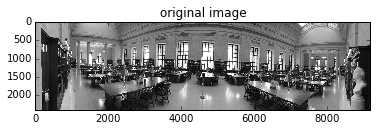

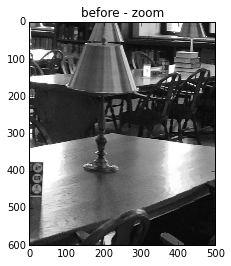

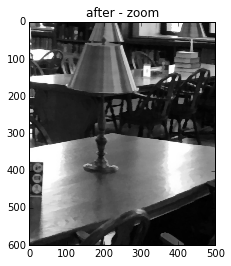

In [12]:

input_image = np.load('image.npz')['image'].astype(np.float32)

pylab.gray()

pylab.imshow(input_image)
pylab.title('original image')

pylab.figure()
pylab.imshow(input_image[1200:1800, 3000:3500])
pylab.title('before - zoom')

# verify correctness
from_cython = py_median_3x3(input_image, 2, 5)
from_numpy = numpy_median(input_image, 2)
assert np.all(from_cython == from_numpy)

with Timer() as t:
    new_image = py_median_3x3(input_image, 10, 8)

pylab.figure()
pylab.imshow(new_image[1200:1800, 3000:3500])
pylab.title('after - zoom')

print("{} seconds for 10 filter passes.".format(t.interval))
pylab.show()


In [29]:
num_balls = 500 #10000
radius = 0.01 #0.002

In [103]:
positions = np.random.uniform(0 + radius, 1 - radius,
                                  (num_balls, 2)).astype(np.float32)

In [31]:
for j in range(1,3):
    print j

1
2


In [83]:
# positions

In [76]:
num_balls = 500#500 #10000
radius = 0.01#0.01 #0.002
positions = np.random.uniform(0 + radius, 1 - radius,
                                  (num_balls, 2)).astype(np.float32)

In [34]:
grid_spacing = radius / np.sqrt(2.0)
grid_size = int((1.0 / grid_spacing) + 1)
grid = - np.ones((grid_size, grid_size))
grid[(positions[:, 0] / grid_spacing).astype(int), (positions[:, 1] / grid_spacing).astype(int)] = np.arange(num_balls)

In [35]:
grid

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ..., 
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [99]:
def less_msb(x, y):
        return x < y and x < (x ^ y)

def cmp_zorder(a, b):
        j = 0
        k = 0
        x = 0
        for k in range(2):
            y = a[1][k] ^ b[1][k]
            if less_msb(x, y):
                j = k
                x = y
        return a[1][j] - b[1][j]

In [37]:
new_order = []
for i in range(len(positions)):

    print (cmp_zorder(int(positions[i, 0]/grid_spacing), int(positions[i, 1]/grid_spacing)))

TypeError: 'int' object has no attribute '__getitem__'

In [84]:
# g_positions = (positions/grid_spacing).astype(int)
# cmp_zorder(10,10)

In [85]:
# g_positions.sort(cmp_zorder)

In [41]:
k = np.array(np.random.randint(0,10))

In [67]:
b = np.random.randint(0, 10, (10, 2))

In [86]:
def cmp_zorder(a, b):
        j = 0
        k = 0
        x = 0
        for k in range(2):
            y = a[k] ^ b[k]
            if less_msb(x, y):
                j = k
                x = y
        return a[j] - b[j]

In [98]:
positions_g = (positions/grid_spacing).astype(int)
# cmp_zorder(positions_g[0,0], positions_g[0,1])

In [104]:
positions_index = zip(range(len(positions)), (positions/grid_spacing).astype(int))

In [111]:
[(i, (positions[i,:]/grid_spacing).astype(int)) for i in xrange(len(positions))]

[(0, array([46, 54])),
 (1, array([88, 84])),
 (2, array([ 41, 135])),
 (3, array([ 50, 126])),
 (4, array([57, 99])),
 (5, array([11,  4])),
 (6, array([115, 135])),
 (7, array([26, 20])),
 (8, array([106,  30])),
 (9, array([34, 12])),
 (10, array([73, 17])),
 (11, array([39,  6])),
 (12, array([ 79, 126])),
 (13, array([96,  9])),
 (14, array([87, 38])),
 (15, array([120,  42])),
 (16, array([68, 26])),
 (17, array([20, 53])),
 (18, array([122,  63])),
 (19, array([ 89, 107])),
 (20, array([67, 72])),
 (21, array([21, 91])),
 (22, array([ 64, 103])),
 (23, array([ 1, 71])),
 (24, array([69, 97])),
 (25, array([113,  45])),
 (26, array([36,  3])),
 (27, array([ 50, 130])),
 (28, array([10, 13])),
 (29, array([ 12, 101])),
 (30, array([127,   8])),
 (31, array([54, 94])),
 (32, array([99, 72])),
 (33, array([22, 97])),
 (34, array([ 74, 104])),
 (35, array([67, 43])),
 (36, array([136,  96])),
 (37, array([35, 73])),
 (38, array([60, 43])),
 (39, array([70, 70])),
 (40, array([ 53, 10

In [105]:
positions_index

[(0, array([46, 54])),
 (1, array([88, 84])),
 (2, array([ 41, 135])),
 (3, array([ 50, 126])),
 (4, array([57, 99])),
 (5, array([11,  4])),
 (6, array([115, 135])),
 (7, array([26, 20])),
 (8, array([106,  30])),
 (9, array([34, 12])),
 (10, array([73, 17])),
 (11, array([39,  6])),
 (12, array([ 79, 126])),
 (13, array([96,  9])),
 (14, array([87, 38])),
 (15, array([120,  42])),
 (16, array([68, 26])),
 (17, array([20, 53])),
 (18, array([122,  63])),
 (19, array([ 89, 107])),
 (20, array([67, 72])),
 (21, array([21, 91])),
 (22, array([ 64, 103])),
 (23, array([ 1, 71])),
 (24, array([69, 97])),
 (25, array([113,  45])),
 (26, array([36,  3])),
 (27, array([ 50, 130])),
 (28, array([10, 13])),
 (29, array([ 12, 101])),
 (30, array([127,   8])),
 (31, array([54, 94])),
 (32, array([99, 72])),
 (33, array([22, 97])),
 (34, array([ 74, 104])),
 (35, array([67, 43])),
 (36, array([136,  96])),
 (37, array([35, 73])),
 (38, array([60, 43])),
 (39, array([70, 70])),
 (40, array([ 53, 10

In [107]:
positions_index.sort(cmp_zorder)
print positions_index

[(179, array([5, 1])), (316, array([8, 5])), (5, array([11,  4])), (452, array([12,  4])), (242, array([13,  7])), (28, array([10, 13])), (248, array([15, 12])), (378, array([14, 15])), (186, array([ 3, 20])), (417, array([ 3, 29])), (185, array([15, 21])), (392, array([ 8, 30])), (435, array([20,  5])), (222, array([25,  2])), (292, array([27,  1])), (410, array([24,  4])), (256, array([25,  6])), (219, array([31,  3])), (280, array([31,  3])), (296, array([29,  5])), (271, array([27, 11])), (78, array([23, 23])), (7, array([26, 20])), (463, array([31, 18])), (305, array([31, 22])), (324, array([25, 27])), (70, array([ 3, 33])), (474, array([ 5, 33])), (75, array([ 6, 33])), (451, array([10, 34])), (165, array([11, 39])), (124, array([11, 44])), (109, array([11, 47])), (74, array([13, 46])), (285, array([ 3, 51])), (393, array([ 6, 51])), (101, array([ 4, 52])), (298, array([ 2, 60])), (128, array([ 9, 50])), (385, array([12, 48])), (133, array([14, 53])), (265, array([12, 63])), (119

In [110]:
a=[i[0] for i in positions_index]
print a

[179, 316, 5, 452, 242, 28, 248, 378, 186, 417, 185, 392, 435, 222, 292, 410, 256, 219, 280, 296, 271, 78, 7, 463, 305, 324, 70, 474, 75, 451, 165, 124, 109, 74, 285, 393, 101, 298, 128, 385, 133, 265, 119, 143, 263, 164, 246, 299, 266, 17, 465, 344, 107, 217, 71, 26, 11, 9, 310, 43, 174, 362, 161, 72, 429, 343, 194, 44, 374, 383, 151, 319, 240, 399, 247, 279, 168, 335, 395, 146, 95, 358, 204, 0, 90, 467, 330, 492, 77, 235, 63, 329, 281, 277, 38, 137, 339, 357, 470, 254, 23, 212, 334, 187, 488, 353, 308, 397, 371, 224, 54, 269, 366, 415, 255, 197, 475, 190, 421, 99, 479, 226, 403, 21, 131, 477, 318, 300, 459, 286, 320, 29, 162, 424, 354, 140, 364, 456, 80, 291, 241, 431, 260, 33, 182, 144, 414, 315, 103, 349, 102, 51, 443, 62, 439, 384, 37, 407, 341, 180, 230, 112, 195, 382, 336, 257, 309, 340, 125, 420, 91, 361, 31, 287, 56, 438, 88, 262, 466, 47, 244, 84, 499, 97, 160, 356, 209, 233, 267, 40, 4, 220, 423, 401, 493, 239, 163, 411, 442, 156, 3, 100, 418, 115, 367, 196, 484, 135, 64, 29

In [ ]:
a = [1,5,9]
b=[3.5, 6.3, 7.9]

In [ ]:
plt.plt(a,b,scattered=True)